In [14]:
# Import Libraries:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime, date

In [15]:
# Reading Apple Stock data:

df = pd.read_csv('AAPL.csv')


# Converting "Date" to "Epoch" Date:
df["timestamp"] = pd.to_datetime(df.Date, origin='unix')
#df["timestampWith"] = (df['timestamp'] - pd.Timestamp("1970-01-01")).dt.days
df["timestampWith"] = (df['timestamp'] - pd.Timestamp("01/01/1970")).dt.days

#Evaluating closing price with timestamp.
dataset = df.values
X = dataset[:,8].reshape(-1,1)
Y = dataset[:,4]


validation_size = 0.15
seed = 7
#
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


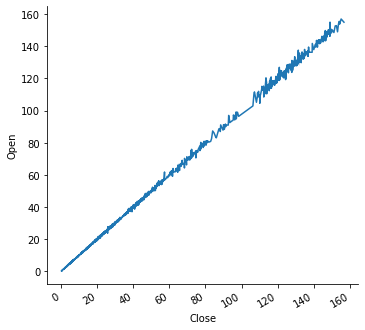

In [16]:
# Data Exploration:

import seaborn as sns
import matplotlib.pyplot as plt
pl1=sns.relplot(x ='Close', y ='Open', kind = 'line', data=df)
pl1.fig.autofmt_xdate()

import plotly.express as px
fig = px.bar(df, x='Date', y='Volume', title="Volume of the Stocks traded")
fig.show()

fig2 = px.line(df, x='Date', y='Low')
fig2.show()


df2 = px.data.stocks(indexed=True)-1
fig4 = px.bar(df2, x=df2.index, y="AAPL", title="Relative Stock Prices")
fig4.show()


fig3 = px.area(df2, x=df2.index, y="AAPL")
fig3.show()


import plotly.graph_objects as go
fig5 = px.histogram(df, x="Date", y="Close", histfunc="avg", title="Average Closing values")
fig5.update_traces(xbins_size="M1")
fig5.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig5.update_layout(bargap=0.1)
fig5.add_trace(go.Scatter(mode="markers", x=df["Date"], y=df["Close"], name="daily"))
fig5.show()


fig6 = px.line(df, x='Date', y='High', title='Time Series with Rangeslider')

fig6.update_xaxes(rangeslider_visible=True)
fig6.show()


fig7 = px.scatter(df, x='Date', y='High', range_x=['2020-12-01', '2021-01-20'],
                 title="Markets Highs on Weekdays")



fig7.show()




fig8 = px.scatter(df, x='Date', y='Low', range_x=['2020-12-01', '2021-01-20'],
                 title="Markets Lows on Weekdays", color='Low')


fig8.show()



fig9 = px.scatter(df, x='High', y='Low', color='High',
                 title="Correlation between High and Low")


fig9.show()

In [17]:
# Introducing Algorithms.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = "r2"

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# evaluate each model for their accuracy:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("Accuracy for" , msg)


Accuracy for  LR : 0.656334 (0.008289)
Accuracy for  LASSO : 0.656334 (0.008289)
Accuracy for  EN : 0.656334 (0.008289)
Accuracy for  KNN : 0.999493 (0.000076)
Accuracy for  CART : 0.999413 (0.000116)
Accuracy for  SVR : 0.914654 (0.007283)


mean_squared_error : 0.08876468047774426
The prediction is based on Decision Tree method


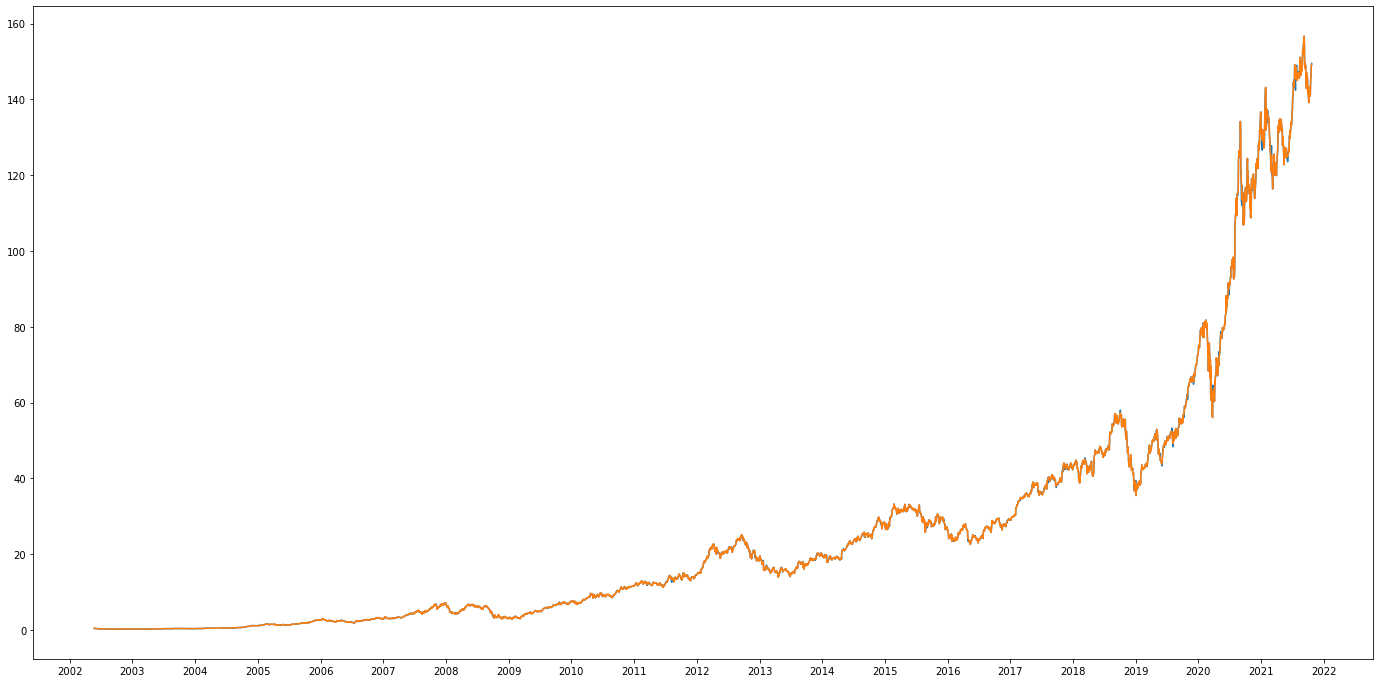

mean_squared_error : 0.3881064330599416
The prediction is based on K Neighbour Regressor method


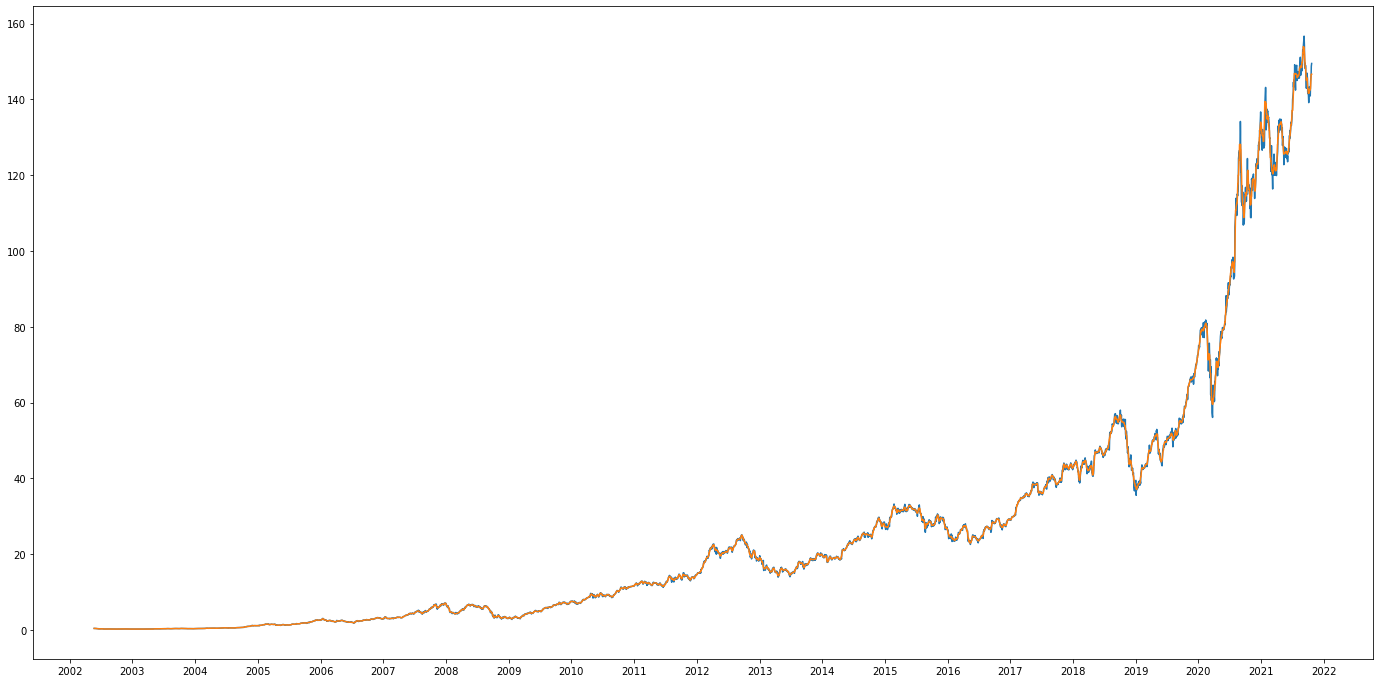

mean_squared_error : 85.9488777400404
The prediction is based on Support Vector Regressor


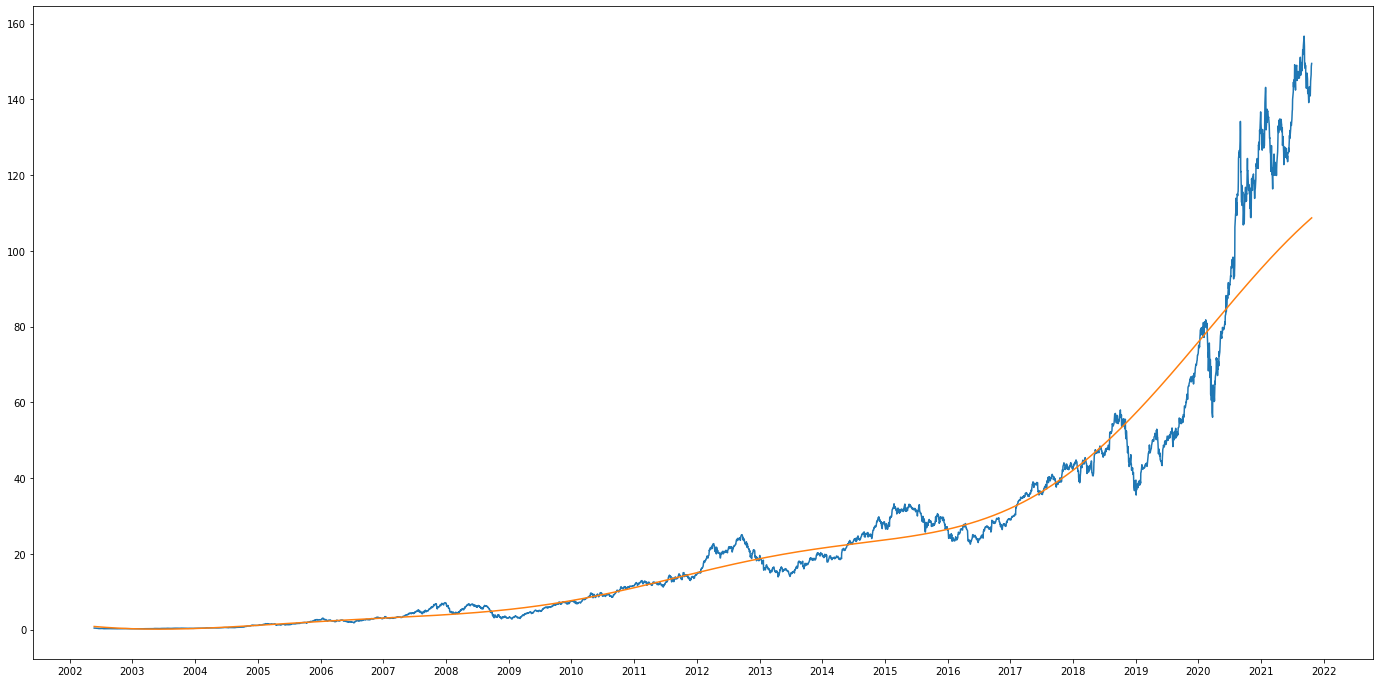

mean_squared_error : 375.54755946837764
The prediction is based on ElasticNet


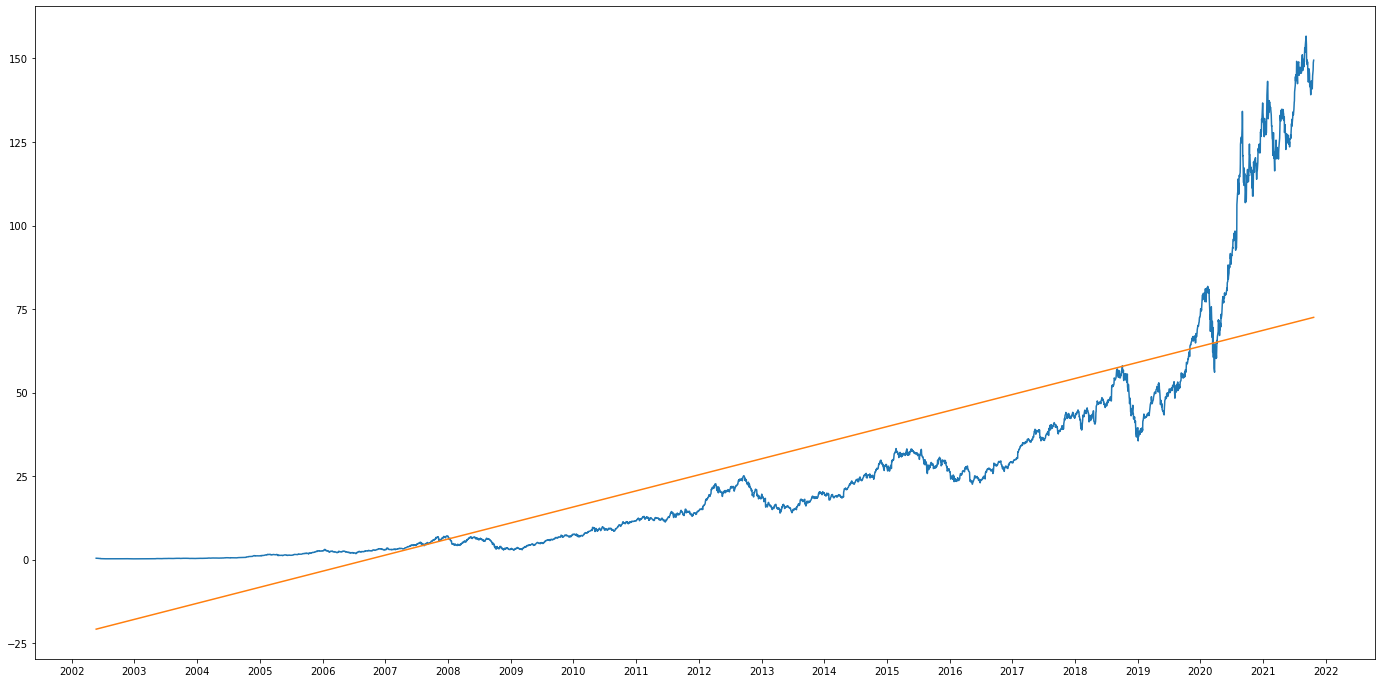

mean_squared_error : 375.54760666258704
The prediction is based on Linear Regression


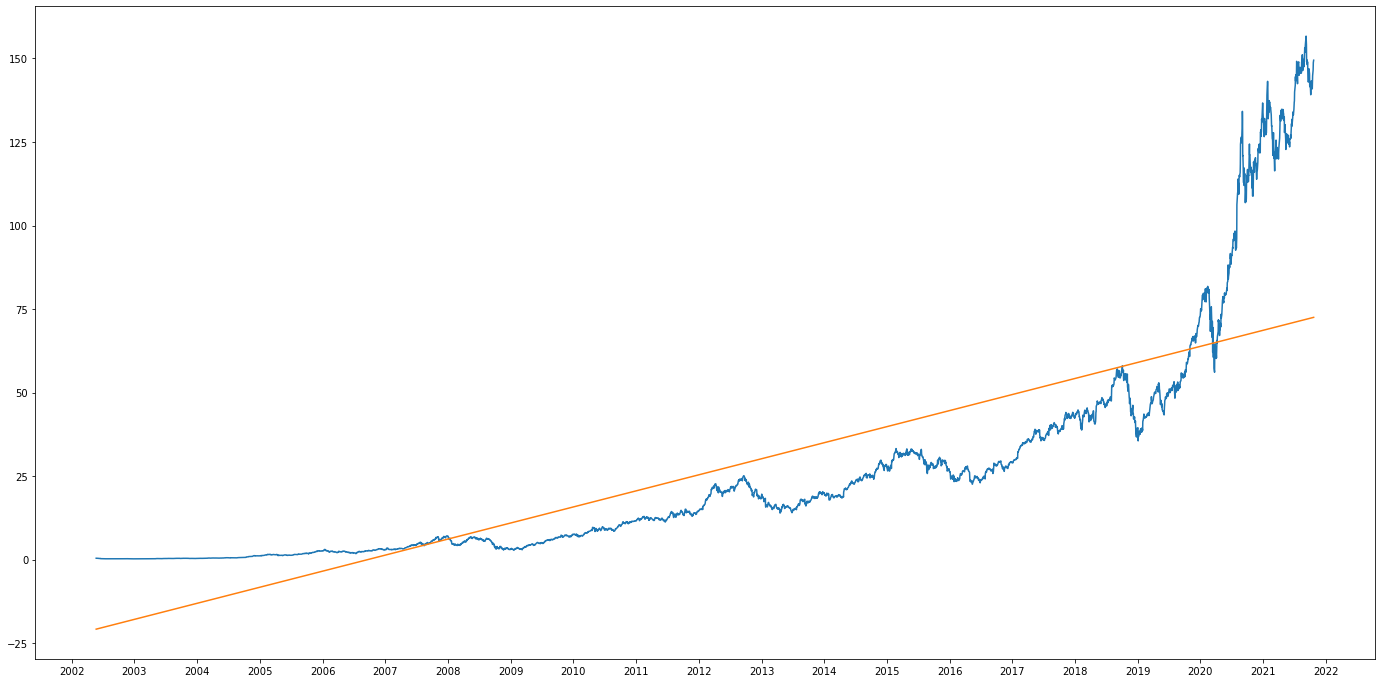

mean_squared_error : 375.5475136183828
The prediction is based on LASSO


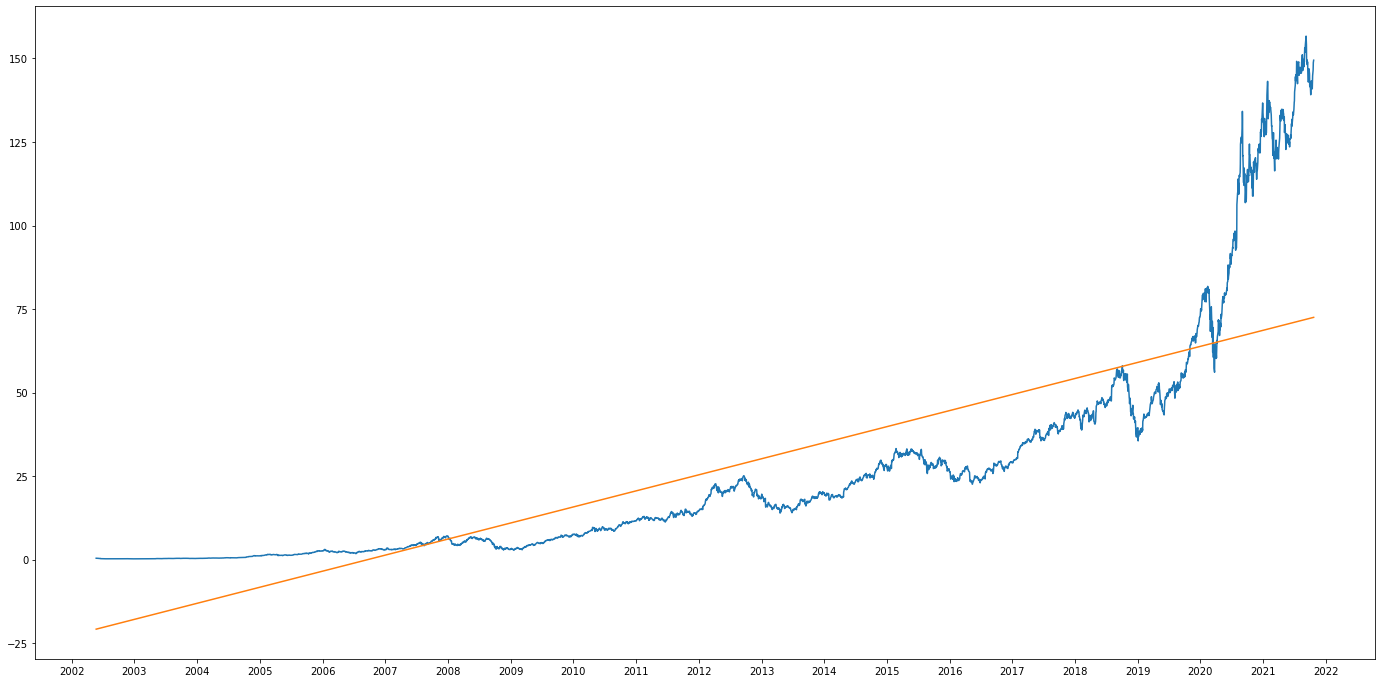

In [19]:
import matplotlib.dates as mdates

#convert to time stamp
for dt in df['Date']:
  datetime_object = datetime.strptime(dt, "%m/%d/%Y")
  timestamp = datetime.timestamp(datetime_object)
  # to array X
  np.append(X, int(timestamp))

##-------------------Algorithm based Predictions-------------------##
    
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error


# Define model DecisionTreeRegressor
######################################
model = DecisionTreeRegressor()

model.fit(X_train, Y_train)   # Fitting it to a model.

predictions = model.predict(X) # Predictions.

print("mean_squared_error :", mean_squared_error(Y, predictions))

print("The prediction is based on Decision Tree method")

#%matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()



##---------------------------------------------------------------------##

# Define model KNeighborsRegressor
#####################################
model = KNeighborsRegressor()

model.fit(X_train, Y_train)   # Fitting it to a model.

predictions = model.predict(X) # Predictions.

print("mean_squared_error :", mean_squared_error(Y, predictions))

print("The prediction is based on K Neighbour Regressor method")

# %matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

##---------------------------------------------------------------------##

# Define model SVR
##################
model = SVR()

model.fit(X_train, Y_train)   # Fitting it to a model.

predictions = model.predict(X) # Predictions.

print("mean_squared_error :", mean_squared_error(Y, predictions))

print("The prediction is based on Support Vector Regressor")

# %matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

##---------------------------------------------------------------------##

# Define model ElasticNet
########################
model = ElasticNet()

model.fit(X_train, Y_train)   # Fitting it to a model.

predictions = model.predict(X) # Predictions.

print("mean_squared_error :", mean_squared_error(Y, predictions))

print("The prediction is based on ElasticNet")

# %matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

##---------------------------------------------------------------------##

# Define model Linear Regression
################################
model = LinearRegression()

model.fit(X_train, Y_train)   # Fitting it to a model.

predictions = model.predict(X) # Predictions.

print("mean_squared_error :", mean_squared_error(Y, predictions))

print("The prediction is based on Linear Regression")

# %matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()

##---------------------------------------------------------------------##

# Define model LASSO
####################
model = Lasso()

model.fit(X_train, Y_train)   # Fitting it to a model.

predictions = model.predict(X) # Predictions.

print("mean_squared_error :", mean_squared_error(Y, predictions))

print("The prediction is based on LASSO")

# %matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()
##---------------------------------------------------------------------##